In [15]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [31]:
# Importing the Dataset
# Source: https://archive.ics.uci.edu/ml/datasets/adult
data = pd.read_csv("adult.data", usecols=[0, 1, 3, 4, 9, 10, 11, 12, 13, 14], names=["age", "workclass", "education", "education_years", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "salary"])

In [32]:
data.head()

,age,workclass,education,education_years,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Female,0,0,40,Cuba,<=50K


In [33]:
data.tail()

,age,workclass,education,education_years,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
32556,27,Private,Assoc-acdm,12,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Female,15024,0,40,United-States,>50K


In [34]:
# Categorizing data into numerical and categorical data
num_data = ["age", "education_years", "capital_gain", "capital_loss", "hours_per_week"]
cat_data = ["workclass", "education", "sex", "native_country", "salary"]

In [35]:
# Frequency Distribution of Categorical Data

for attribute in cat_data:
    freq_dist = dict.fromkeys(data[attribute].unique(), 0)
    for a in range(len(data[attribute])):
        freq_dist[data[attribute][a]] += 1
    
    print("Attribute:", attribute)
    for val in data[attribute].unique():
        print(val + ":", freq_dist[val])
    print()
    print("-----------------------------")
    print()

Attribute: workclass
 State-gov: 1298
 Self-emp-not-inc: 2541
 Private: 22696
 Federal-gov: 960
 Local-gov: 2093
 ?: 1836
 Self-emp-inc: 1116
 Without-pay: 14
 Never-worked: 7

-----------------------------

Attribute: education
 Bachelors: 5355
 HS-grad: 10501
 11th: 1175
 Masters: 1723
 9th: 514
 Some-college: 7291
 Assoc-acdm: 1067
 Assoc-voc: 1382
 7th-8th: 646
 Doctorate: 413
 Prof-school: 576
 5th-6th: 333
 10th: 933
 1st-4th: 168
 Preschool: 51
 12th: 433

-----------------------------

Attribute: sex
 Male: 21790
 Female: 10771

-----------------------------

Attribute: native_country
 United-States: 29170
 Cuba: 95
 Jamaica: 81
 India: 100
 ?: 583
 Mexico: 643
 South: 80
 Puerto-Rico: 114
 Honduras: 13
 England: 90
 Canada: 121
 Germany: 137
 Iran: 43
 Philippines: 198
 Italy: 73
 Poland: 60
 Columbia: 59
 Cambodia: 19
 Thailand: 18
 Ecuador: 28
 Laos: 18
 Taiwan: 51
 Haiti: 44
 Portugal: 37
 Dominican-Republic: 70
 El-Salvador: 106
 France: 29
 Guatemala: 64
 China: 75
 Japan

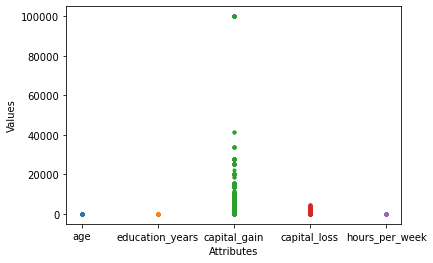

In [36]:
# Graphical frequency distribution of Numerical Attributes 
for a in range(len(num_data)):
    plt.plot(len(data[num_data[a]]) * [a], data[num_data[a]], ".")
    
plt.ylabel("Values")
plt.xlabel("Attributes")
plt.xticks([a for a in range(len(num_data))], num_data)
plt.show()

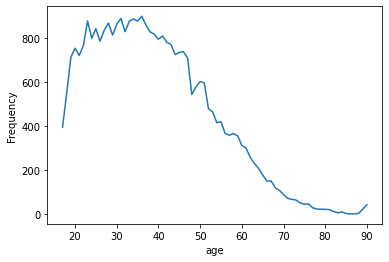

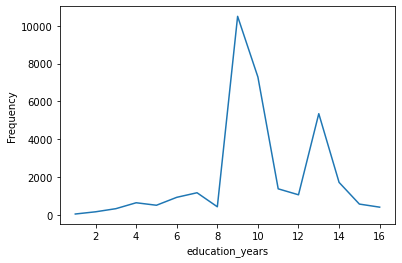

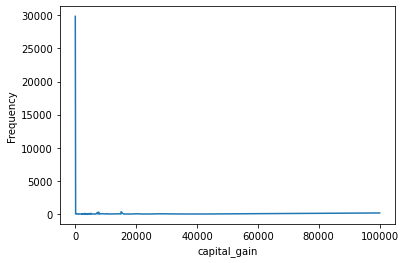

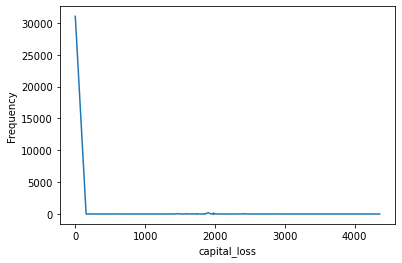

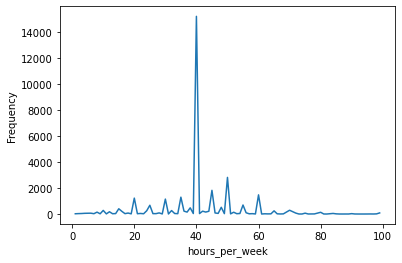

In [37]:
# Frequncy Distribution of each numerical attribute

for attribute in num_data:
    freq_dist = dict.fromkeys(data[attribute].unique(), 0)
    for a in range(len(data[attribute])):
        freq_dist[data[attribute][a]] += 1
        
    x = sorted(data[attribute].unique())
    y = [freq_dist[val] for val in x]
    plt.plot(x, y)
    plt.ylabel("Frequency")
    plt.xlabel(attribute)
    plt.show()


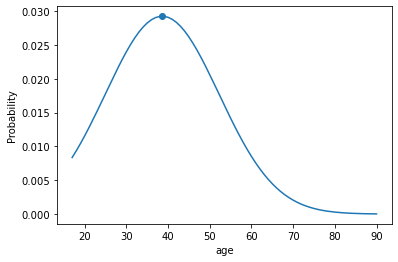

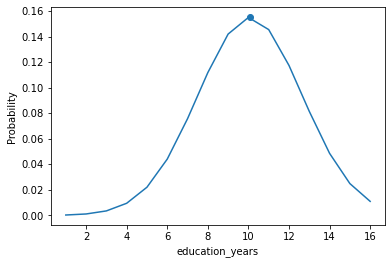

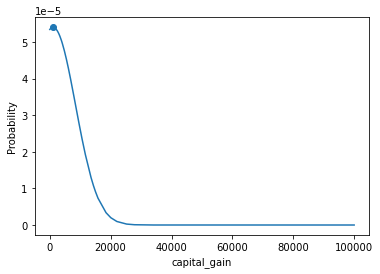

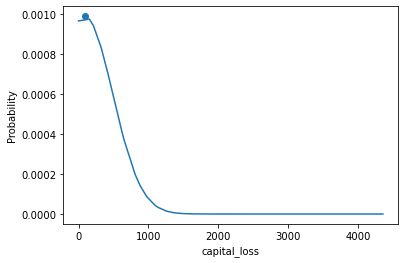

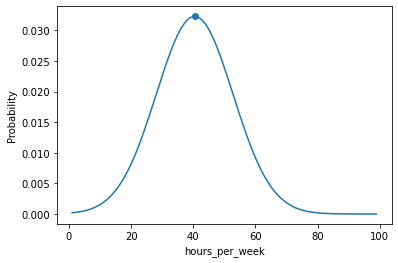

In [38]:
# Normal Distributions
for attribute in num_data:
    arr = sorted(data[attribute])
    mean = np.mean(arr)
    std = np.std(arr)
    pdf = stats.norm.pdf(arr, mean, std)
    plt.plot(arr, pdf)
    plt.scatter(mean, stats.norm.pdf(mean, mean, std))
    plt.ylabel("Probability")
    plt.xlabel(attribute)
    plt.show()

In [41]:
# Measures of Central Tendency

Central = pd.DataFrame(num_data, columns=["Attribute"])
Central["Arithmetic Mean"] = [data[column].mean() for column in num_data]
Central["Mode"] = [data.mode().iloc[0][column] for column in num_data]
Central["Lower Quartile"] = [data[column].quantile(0.25) for column in num_data]
Central["Median"] = [data[column].median() for column in num_data]
Central["Upper Quartile"] = [data[column].quantile(0.75) for column in num_data]

Central.head(len(num_data))

,Attribute,Arithmetic Mean,Mode,Lower Quartile,Median,Upper Quartile
0,age,38.581647,36,28.0,37.0,48.0
1,education_years,10.080679,9,9.0,10.0,12.0
2,capital_gain,1077.648844,0,0.0,0.0,0.0
3,capital_loss,87.303830,0,0.0,0.0,0.0
4,hours_per_week,40.437456,40,40.0,40.0,45.0


In [43]:
# Measures of Dispersion

Dispersion = pd.DataFrame(num_data, columns=["Attribute"])
Dispersion["Minimum"] = [data[column].min() for column in num_data]
Dispersion["Maximum"] = [data[column].max() for column in num_data]
Dispersion["Standard Deviation"] = [data[column].std() for column in num_data]
Dispersion["Variance"] = [data[column].std() ** 2 for column in num_data]

Dispersion.head(len(num_data))

,Attribute,Minimum,Maximum,Standard Deviation,Variance
0,age,17,90,13.640433,1.860614e+02
1,education_years,1,16,2.572720,6.618890e+00
2,capital_gain,0,99999,7385.292085,5.454254e+07
3,capital_loss,0,4356,402.960219,1.623769e+05
4,hours_per_week,1,99,12.347429,1.524590e+02
